# Hyperparameter Tuning/Optimization

We want to prevent Model Overfitting (good training acccuracy but poor testing)

In [1]:
from xgboost import XGBClassifier

#parameters
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import matplotlib.pyplot as plt

df = pd.read_csv("datasets/banks-uci/bank-full.csv", sep=";")
df = df.rename(columns={"y": "subscribed"})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
x_encoder = OrdinalEncoder()
y_encoder = LabelEncoder() 

In [4]:
#duplicate dataframe
df_new = df

In [5]:
df_new['subscribed'] = y_encoder.fit_transform(df_new['subscribed'])
df_new[['job', 'marital', 'education', 'default','housing',
       'loan', 'contact', 'month', 'poutcome']] = x_encoder.fit_transform(df_new[['job', 'marital', 'education', 'default','housing',
       'loan', 'contact', 'month', 'poutcome']])

df_new.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0,0
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0,0
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0,0
3,47,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,8.0,92,1,-1,0,3.0,0
4,33,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,8.0,198,1,-1,0,3.0,0


In [6]:
x_columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']
print(x_columns)

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']


In [7]:
X = df_new[x_columns]
Y = df_new['subscribed']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=100, 
                                                    shuffle=True, stratify=Y)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(31647, 16) (31647,)
(13564, 16) (13564,)


In [12]:
model_A = XGBClassifier()
model_A.fit(X_train, Y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

pred_test_A = model_A.predict(X_test)

print("Test Accuracy---------------")
print(accuracy_score(Y_test, pred_test_A))
print(classification_report(Y_test, pred_test_A))
pd.crosstab(Y_test, pred_test_A)

Test Accuracy---------------
0.9071070480684164
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11977
           1       0.64      0.47      0.54      1587

    accuracy                           0.91     13564
   macro avg       0.79      0.72      0.74     13564
weighted avg       0.90      0.91      0.90     13564



col_0,0,1
subscribed,,
0,11561,416
1,844,743


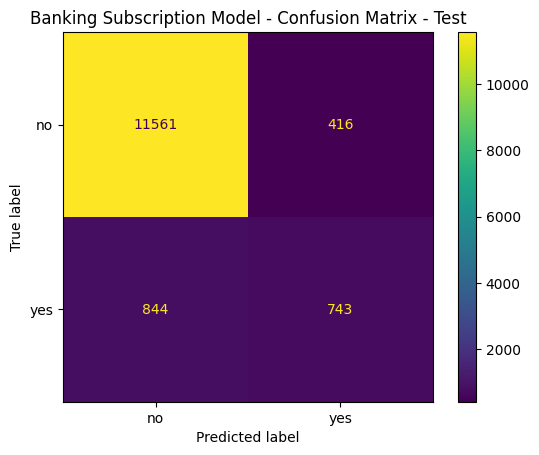

In [13]:
ConfusionMatrixDisplay(confusion_matrix(Y_test, pred_test_A), display_labels=y_encoder.classes_).plot()
plt.title("Banking Subscription Model - Confusion Matrix - Test")
plt.show()

In [15]:
pred_train_A = model_A.predict(X_train)

print("Train Accuracy---------------")
print(accuracy_score(Y_train, pred_train_A))
print(classification_report(Y_train, pred_train_A))
pd.crosstab(Y_train, pred_train_A)

Train Accuracy---------------
0.956615160994723
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     27945
           1       0.89      0.72      0.79      3702

    accuracy                           0.96     31647
   macro avg       0.93      0.85      0.89     31647
weighted avg       0.95      0.96      0.95     31647



col_0,0,1
subscribed,,
0,27617,328
1,1045,2657


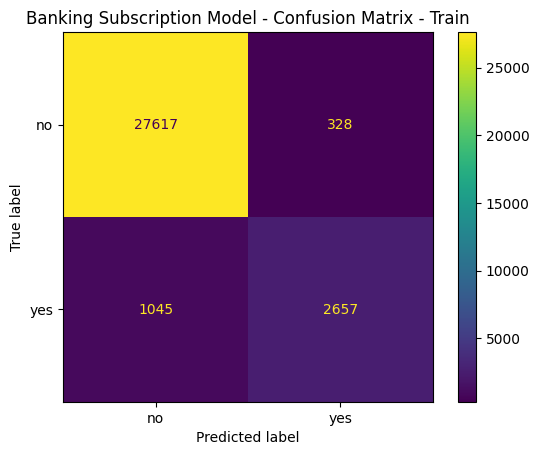

In [16]:
ConfusionMatrixDisplay(confusion_matrix(Y_train, pred_train_A), display_labels=y_encoder.classes_).plot()
plt.title("Banking Subscription Model - Confusion Matrix - Train")
plt.show()

## Retrain the model

In [28]:
model_B = XGBClassifier(
    max_depth=10, #2
    subsample = 0.5, #0.5
    n_estimators = 200, #2 100 200
    learning_rate = 0.05, #0.1, 0.01, 1
    min_child_weight = 1,
    random_state=10 #
)

model_B.fit(X_train, Y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

pred_train_B = model_B.predict(X_train)
pred_test_B = model_B.predict(X_test)


print("Train Accuracy (Model B)---------------")
print(accuracy_score(Y_train, pred_train_B))

print("Test Accuracy (Model B)---------------")
print(accuracy_score(Y_test, pred_test_B))

Train Accuracy (Model B)---------------
0.975669099756691
Test Accuracy (Model B)---------------
0.9051902093777646


## Grid Search

In [33]:
#define parameters

xgb_params = {
    "max_depth": [2, 10],
    "sampling_method":["uniform", "gradient_based"],
    "n_estimators" : [100, 150, 200],
    "learning_rate" : [0.05, 0.1], 
    "min_child_weight" : [0.2, 1]
}

In [35]:
model_C = XGBClassifier(
    seed = 123
    #,eval_metric = "merror"
)

model_C

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [40]:
from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(
    estimator = model_C,
    param_grid = xgb_params,
    n_jobs=1, cv=10,
    scoring='accuracy',
    error_score=0 
)

xgb_grid_search_result = grid_search.fit(X_train, Y_train)

get the best parameters & use them to train the model

In [41]:
model_C_best = model_C.set_params(
    **xgb_grid_search_result.best_params_
)

In [42]:
model_C_best.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=0.2, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Results

In [43]:
pred_train_C = model_C_best.predict(X_train)
pred_test_C = model_C_best.predict(X_test)


print("Train Accuracy (Model C)---------------")
print(accuracy_score(Y_train, pred_train_C))

print("Test Accuracy (Model C)---------------")
print(accuracy_score(Y_test, pred_test_C))

Train Accuracy (Model C)---------------
0.9815148355294341
Test Accuracy (Model C)---------------
0.9060011795930404
